# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

c:\users\caooc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.
data = athletes.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.7+ KB


In [7]:
gold_max = data[data['gold'] == data.gold.max()]
gold_max

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
7401,491565031,Michael Phelps,USA,male,6/30/85,1.94,90.0,aquatics,5,1,0


In [9]:
data['total_medalhas'] = data[['gold','silver','bronze']].sum(axis=1)
data[data['total_medalhas'] == data['total_medalhas'].max()]
data[data['total_medalhas'] == 4]

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,total_medalhas
3048,661638106,Emma McKeon,AUS,female,5/24/94,1.80,60.0,aquatics,1,2,1,4
5554,643664378,Katinka Hosszu,HUN,female,5/3/89,1.75,68.0,aquatics,3,1,0,4
6522,37020908,Madeline Dirado,USA,female,4/5/93,1.76,64.0,aquatics,2,1,1,4
7936,776128059,Nathan Adrian,USA,male,12/7/88,1.99,102.0,aquatics,2,0,2,4
8593,239797947,Penny Oleksiak,CAN,female,6/13/00,1.86,68.0,aquatics,1,1,2,4
9902,973414226,Simone Manuel,USA,female,8/2/96,1.78,72.0,aquatics,2,2,0,4


c:\users\caooc\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\caooc\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


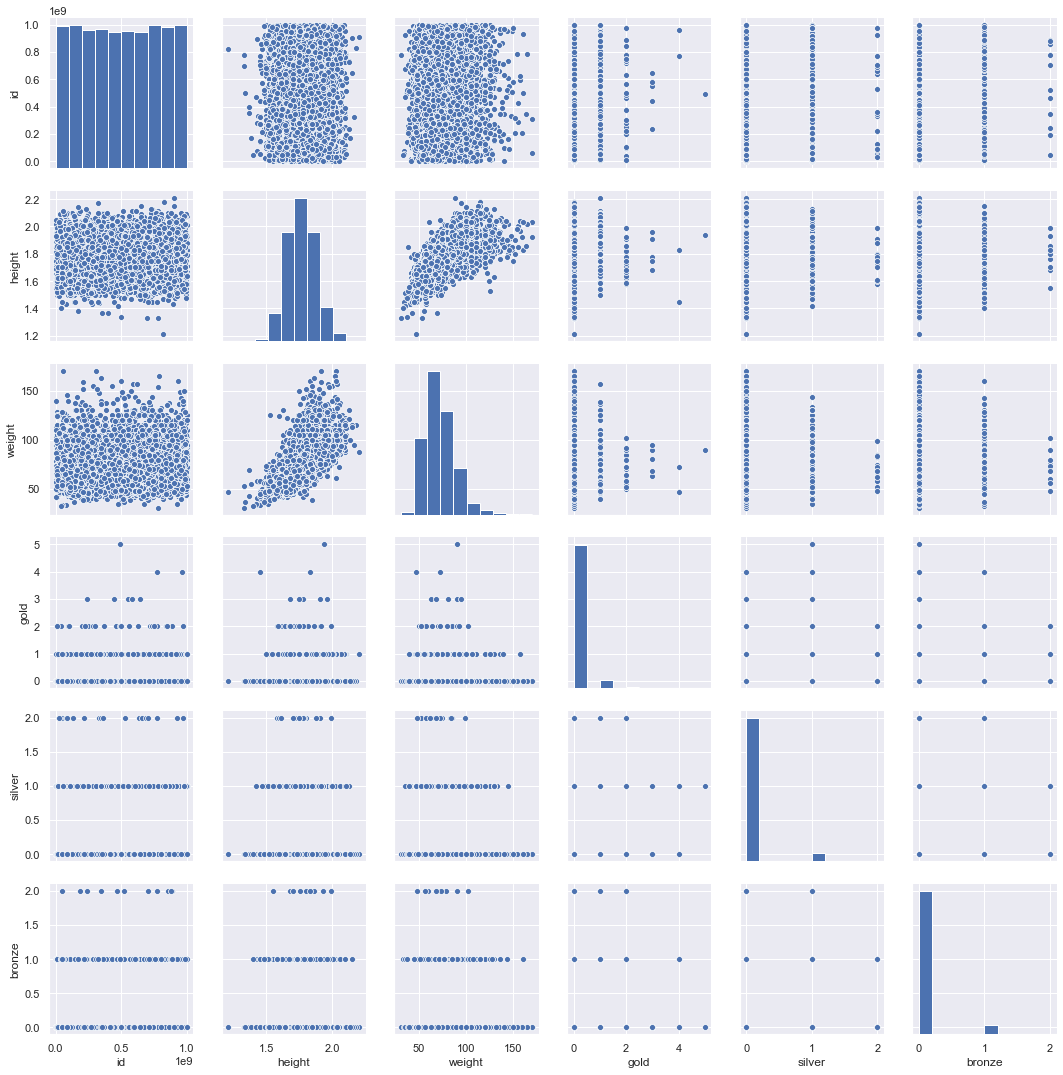

In [17]:
sns.pairplot(data)

In [10]:
data.drop('total_medalhas', inplace=True, axis=1)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [50]:
def q1():
    amostra = get_sample(data, 'height', 3000).ravel()
    alpha = 0.05
    p_valor = sct.shapiro(amostra)[1]
    dist_normal = p_valor > alpha
    
    return dist_normal
    

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

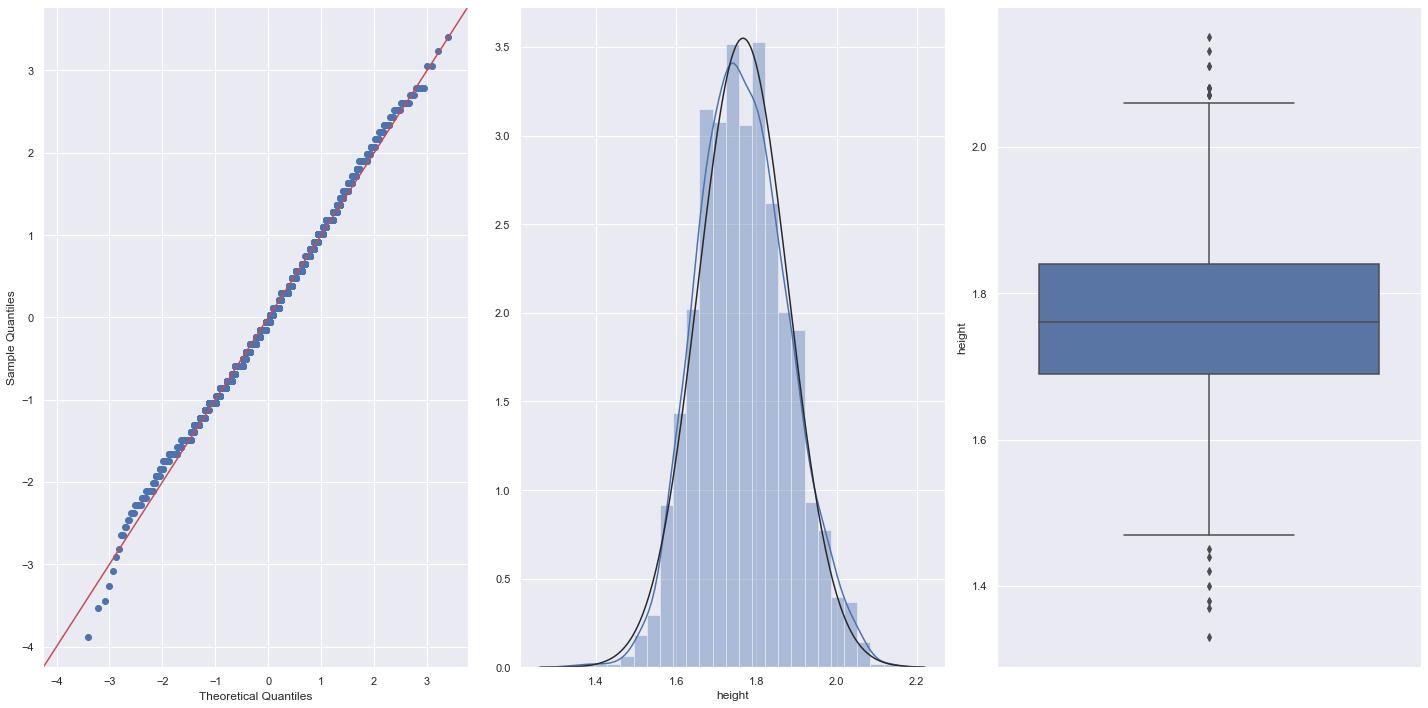

In [63]:
# q1()
amostra_teste = get_sample(data, 'height', 3000)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20,10))
sm.qqplot(amostra_teste, fit=True, line='45', ax=ax1)
sns.distplot(amostra_teste, fit=sct.norm, bins=25, kde=True, ax=ax2)
sns.boxplot(y = amostra_teste, ax=ax3)
plt.tight_layout()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [74]:
def q2():
    alpha = 0.05 # 5%
    amostra_2 = get_sample(data, 'height', 3000).ravel()
    p_valor = sct.jarque_bera(amostra_2)[1].item()
    normal_dist = p_valor > alpha
    return normal_dist

__Para refletir__:

* Esse resultado faz sentido?

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [78]:
def q3():
    alpha = 0.05 # 5%
    amostra = get_sample(data, 'weight', 3000).ravel()
    p_valor = sct.normaltest(amostra)[1].item()
    dist_normal = p_valor > alpha
    return dist_normal

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [80]:
def q4():
    alpha = 0.05 #5%
    sample = np.log(get_sample(data, 'weight', 3000).ravel())
    p_valor = sct.normaltest(sample)[1].item()
    dist_normal = p_valor > alpha
    return dist_normal

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [84]:
def q5():
    alpha = 0.05
    brasil = data.loc[data.nationality == "BRA", 'height'].dropna()
    usa = data.loc[data.nationality == "USA", 'height'].dropna()
    
    p_valor = sct.ttest_ind(brasil, usa, equal_var=False)[1].item()
    stats_equal = p_valor>alpha
    return stats_equal    

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [91]:
def q6():
    alpha=0.05
    brasil = data.loc[data.nationality == "BRA", 'height'].dropna()
    usa = data.loc[data.nationality == "USA", 'height'].dropna()
    can = data.loc[data.nationality == "CAN", 'height'].dropna()
    p_valor = sct.ttest_ind(brasil,can,equal_var=False)[1].item()
    stats_equal = p_valor>alpha
    return stats_equal

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [94]:
def q7():
    alpha=0.05
    usa = data.loc[data.nationality == "USA", 'height'].dropna()
    can = data.loc[data.nationality == "CAN", 'height'].dropna()
    p_valor = sct.ttest_ind(usa,can,equal_var=False)[1].item()
    return round(p_valor,8)

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?